### Data preprocessing and classical solution
Using python and pytorch

### Outline:
<ol>
<li>Importing the dataset.</li>
<li>Finding correlated features</li>
<li>Checking for missing values.</li>
<li>Descriptive statistics.</li>
<li>Scaling.</li>
<li>Building the dataset.</li>
<li>Building the classical solution using pytorch.</li>
<li>Running the model.</li>
<li>Evaluation.</li>
</ol>

The dataset was first downloaded from the github repository of the challenge having 5000 samples. Then uploaded to google drive then the drive was mounted to the jupyter notebook.

### Importing the dataset:

In [1]:
column_names = ["label", "lepton  pT", "lepton  eta", "lepton  phi", "missing energy magnitude", "missing energy phi", "jet 1 pt", "jet 1 eta", "jet 1 phi", "jet 1 b-tag", "jet 2 pt", "jet 2 eta", "jet 2 phi", "jet 2 b-tag", "jet 3 pt", "jet 3 eta", "jet 3 phi", "jet 3 b-tag", "jet 4 pt", "jet 4 eta", "jet 4 phi", "jet 4 b-tag", "m_jj", "m_jjj", "m_lv", "m_jlv", "m_bb", "m_wbb", "m_wwbb"]

In [2]:
len(column_names)

29

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare data
df = pd.read_csv("/content/drive/MyDrive/challenge_higgs_data.csv")
df.columns = column_names
features = df.iloc[:, 1:-1]  # all 28 features

### Finding correlated features:

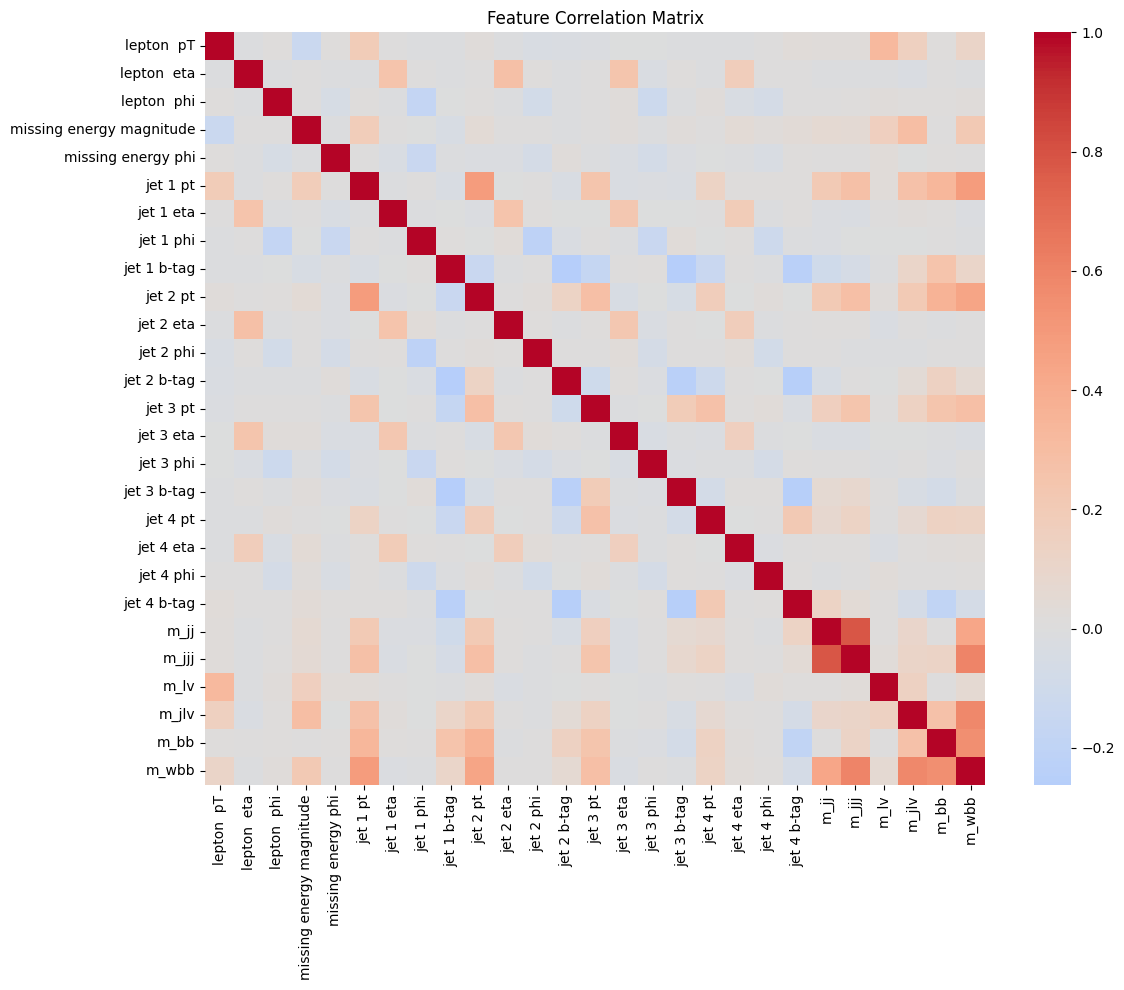

In [4]:
# Compute correlation
corr_matrix = features.corr()

# Visualize
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

In [5]:
# Absolute correlation matrix
abs_corr = corr_matrix.abs()

# Select upper triangle (to avoid duplicate pairs)
upper = abs_corr.where(np.triu(np.ones(abs_corr.shape), k=1).astype(bool))

# Find columns to drop
drop_columns = [column for column in upper.columns if any(upper[column] > 0.9)]

print(f"Highly correlated features: {drop_columns}")

# Reduce feature set
features_uncorrelated = features.drop(columns=drop_columns)

Highly correlated features: []


It is worth mentioning that the first column has the label of 0 or 1, so it is the target value. The last 7 columns are features built from the other 21 features resembling the measured data from collisions. As we can see, none of the columns are correlated, so we will use all features, the 21 and the 7. Also, the 7 can be used alone, if fewer features are to be used due to computationl resources for example.

### Checking for missing values:

In [6]:
# Check total missing values per column
missing_counts = df.isnull().sum()
print(missing_counts)

label                       0
lepton  pT                  0
lepton  eta                 0
lepton  phi                 0
missing energy magnitude    0
missing energy phi          0
jet 1 pt                    0
jet 1 eta                   0
jet 1 phi                   0
jet 1 b-tag                 0
jet 2 pt                    0
jet 2 eta                   0
jet 2 phi                   0
jet 2 b-tag                 0
jet 3 pt                    0
jet 3 eta                   0
jet 3 phi                   0
jet 3 b-tag                 0
jet 4 pt                    0
jet 4 eta                   0
jet 4 phi                   0
jet 4 b-tag                 0
m_jj                        0
m_jjj                       0
m_lv                        0
m_jlv                       0
m_bb                        0
m_wbb                       0
m_wwbb                      0
dtype: int64


As we can see clearly from the above code, the dataset contains no missing values.

### Descriptive statistics:

As clearly seen from the statistics plotted below, we need to scale our data to get a mean of 0 and standard deviation (std) of 1. As without that some features might be given more focus when training.

In [7]:
df.describe()

,label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.50000,0.995709,-0.021194,0.026693,0.996406,0.008497,0.977831,-0.011761,-0.029363,0.990705,...,0.008127,-0.028709,1.020855,1.030337,1.022460,1.053933,0.999071,0.968753,1.025804,0.957775
std,0.50005,0.575318,1.014174,1.004380,0.608724,0.996921,0.464100,1.018543,1.009898,1.029749,...,1.004124,0.995058,1.411596,0.646543,0.358682,0.173676,0.393024,0.517706,0.351080,0.313237
min,0.00000,0.274697,-2.420367,-1.741953,0.027486,-1.743339,0.193200,-2.959823,-1.741237,0.000000,...,-2.497265,-1.742136,0.000000,0.156114,0.298928,0.631628,0.445966,0.095728,0.442449,0.457610
25%,0.00000,0.590570,-0.761698,-0.833784,0.569239,-0.855051,0.676222,-0.732796,-0.928662,0.000000,...,-0.700865,-0.881745,0.000000,0.788066,0.846573,0.985666,0.768348,0.676070,0.815281,0.767655
50%,0.50000,0.853005,-0.019047,0.030934,0.881310,0.022078,0.886666,-0.019830,-0.036253,1.086538,...,0.009117,-0.042438,0.000000,0.894822,0.948148,0.989882,0.907602,0.876501,0.945800,0.870440
75%,1.00000,1.237919,0.719952,0.904563,1.283316,0.858473,1.145136,0.687442,0.845167,2.173076,...,0.720972,0.813895,3.101961,1.027096,1.085620,1.022435,1.124649,1.137528,1.128480,1.048102
max,1.00000,5.320990,2.432920,1.741017,7.586210,1.743063,4.099514,2.961752,1.741454,2.173076,...,2.494678,1.743372,3.101961,11.862831,6.078972,3.355862,5.617763,5.997863,3.963522,3.628601


In [8]:
label_counts = df['label'].value_counts()
print(label_counts)

label
0.0    2500
1.0    2500
Name: count, dtype: int64


### Scaling:

In [9]:
from sklearn.preprocessing import StandardScaler

# Separate labels and features
labels = df.iloc[:, 0]              # First column = labels (0 or 1)
features = df.iloc[:, 1:]           # Columns 2 to end = features

# Apply standardization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Combine back into a DataFrame if needed
df_scaled = pd.concat([
    labels.reset_index(drop=True),
    pd.DataFrame(features_scaled, columns=features.columns)
], axis=1)

we now show the statistics another time to see if the scaling worked well. And as we can see the mean is approximately 0 and std is approximately 1 for all the features, except first column since this is the target/labels column and not a feature.

In [10]:
df_scaled.describe()

,label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,5000.00000,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,...,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,0.50000,-9.166001e-17,-1.243450e-18,1.989520e-17,-1.165290e-16,-3.552714e-17,-2.273737e-17,-3.055334e-17,2.913225e-17,-7.194245e-17,...,-8.526513e-18,-3.694822e-17,3.552714e-17,-1.676881e-16,-2.401634e-16,2.415845e-17,-1.151079e-16,-8.668621e-17,1.065814e-17,-1.882938e-16
std,0.50005,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,...,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,0.00000,-1.253365e+00,-2.365879e+00,-1.761110e+00,-1.591880e+00,-1.757421e+00,-1.690820e+00,-2.894681e+00,-1.695265e+00,-9.621802e-01,...,-2.495352e+00,-1.722109e+00,-7.232649e-01,-1.352287e+00,-2.017395e+00,-2.431813e+00,-1.407446e+00,-1.686502e+00,-1.661768e+00,-1.596924e+00
25%,0.00000,-7.042688e-01,-7.302274e-01,-8.568107e-01,-7.018107e-01,-8.663009e-01,-6.499452e-01,-7.079785e-01,-8.905731e-01,-9.621802e-01,...,-7.061507e-01,-8.573580e-01,-7.232649e-01,-3.747562e-01,-4.904176e-01,-3.931107e-01,-5.871045e-01,-5.654032e-01,-5.997023e-01,-6.070157e-01
50%,0.50000,-2.480671e-01,2.117975e-03,4.222863e-03,-1.890948e-01,1.362461e-02,-1.964532e-01,-7.922695e-03,-6.823132e-03,9.307336e-02,...,9.859350e-04,-1.379825e-02,-7.232649e-01,-2.096209e-01,-2.072014e-01,-3.688321e-01,-2.327540e-01,-1.782126e-01,-2.279029e-01,-2.788434e-01
75%,1.00000,4.210447e-01,7.308617e-01,8.741294e-01,4.713772e-01,8.526855e-01,3.605291e-01,6.865424e-01,8.660461e-01,1.148327e+00,...,7.099890e-01,8.468729e-01,1.474441e+00,-5.013296e-03,1.761085e-01,-1.813753e-01,3.195494e-01,3.260380e-01,2.924880e-01,2.883938e-01
max,1.00000,7.518816e+00,2.420058e+00,1.707019e+00,1.082668e+01,1.740096e+00,6.726986e+00,2.919672e+00,1.753636e+00,1.148327e+00,...,2.476586e+00,1.781060e+00,1.474441e+00,1.675617e+01,1.409887e+01,1.325550e+01,1.175286e+01,9.715190e+00,8.368505e+00,8.527393e+00


### Building the Dataset:

We first start by preparing the data, splitting the features columns from the label column and building the train and test datasets.

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Load dataset
df = df_scaled

# Extract features and labels
X = df.iloc[:, 1:].values.astype(np.float32)  # features (columns 1–28)
y = df.iloc[:, -0].values.astype(np.int64)      # target label (first column)

# Optional: use only high-level features
# X = df.iloc[:, 22:].values.astype(np.float32)  # columns 22–28

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=36, stratify=y
)

In [12]:
unique, counts = np.unique(y_train, return_counts=True)
label_distribution = dict(zip(unique, counts))
print(label_distribution)

{np.int64(0): np.int64(1875), np.int64(1): np.int64(1875)}


We now transform this dataset into a torch dataset to be able to use it with torch. As pyTorch models expect inputs in the form of "torch.Tensor". It's the native data structure for all computations.

In [13]:
# Torch Dataset
class PhysicsDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X)
        self.y = torch.tensor(y)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = PhysicsDataset(X_train, y_train)
test_dataset = PhysicsDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024)

### Building the classical solution using pytorch:

In [14]:
class ParticleNet(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )

    def forward(self, x):
        return self.net(x)

### Running the model:

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ParticleNet(input_dim=X.shape[1]).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(150):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        optimizer.zero_grad()
        logits = model(batch_X)
        loss = criterion(logits, batch_y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1} | Loss: {total_loss:.3f}")

Epoch 1 | Loss: 2.773
Epoch 2 | Loss: 2.764
Epoch 3 | Loss: 2.754
Epoch 4 | Loss: 2.738
Epoch 5 | Loss: 2.711
Epoch 6 | Loss: 2.678
Epoch 7 | Loss: 2.631
Epoch 8 | Loss: 2.576
Epoch 9 | Loss: 2.543
Epoch 10 | Loss: 2.517
Epoch 11 | Loss: 2.480
Epoch 12 | Loss: 2.450
Epoch 13 | Loss: 2.432
Epoch 14 | Loss: 2.407
Epoch 15 | Loss: 2.378
Epoch 16 | Loss: 2.348
Epoch 17 | Loss: 2.331
Epoch 18 | Loss: 2.299
Epoch 19 | Loss: 2.277
Epoch 20 | Loss: 2.243
Epoch 21 | Loss: 2.218
Epoch 22 | Loss: 2.169
Epoch 23 | Loss: 2.157
Epoch 24 | Loss: 2.115
Epoch 25 | Loss: 2.080
Epoch 26 | Loss: 2.043
Epoch 27 | Loss: 2.009
Epoch 28 | Loss: 1.973
Epoch 29 | Loss: 1.927
Epoch 30 | Loss: 1.889
Epoch 31 | Loss: 1.832
Epoch 32 | Loss: 1.801
Epoch 33 | Loss: 1.766
Epoch 34 | Loss: 1.725
Epoch 35 | Loss: 1.693
Epoch 36 | Loss: 1.657
Epoch 37 | Loss: 1.616
Epoch 38 | Loss: 1.550
Epoch 39 | Loss: 1.507
Epoch 40 | Loss: 1.473
Epoch 41 | Loss: 1.442
Epoch 42 | Loss: 1.422
Epoch 43 | Loss: 1.391
Epoch 44 | Loss: 1.4

### Evaluation:

In [16]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == batch_y).sum().item()
        total += batch_y.size(0)

print(f"Test Accuracy: {correct*100 / total:.4f}%")

Test Accuracy: 60.4800%


In [17]:
from sklearn.metrics import roc_auc_score
import torch.nn.functional as F

model.eval()
all_probs = []
all_labels = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        logits = model(batch_X)
        probs = F.softmax(logits, dim=1)[:, 1]  # Get probability for class 1
        all_probs.extend(probs.cpu().numpy())
        all_labels.extend(batch_y.cpu().numpy())

auc_score = roc_auc_score(all_labels, all_probs)
print(f"ROC AUC Score: {auc_score:.4f}")

ROC AUC Score: 0.6397


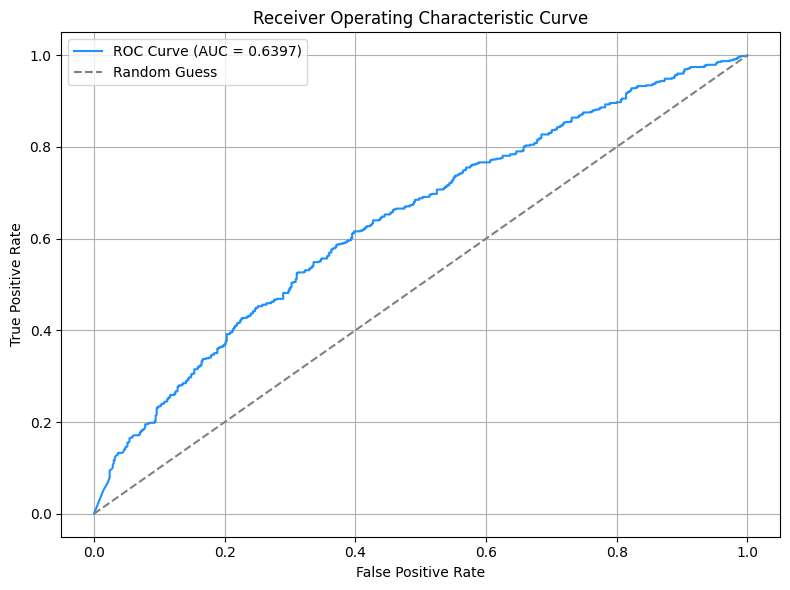

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate FPR, TPR
fpr, tpr, thresholds = roc_curve(all_labels, all_probs)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})', color='dodgerblue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()